In [8]:
train_set_f = "data/ready/pbmc_4k8k_clean_gdt_scvi_integrated.h5ad"
val_set_f = "data/ready/pbmc_3p5p_clean_gdt_scvi_integrated.h5ad"

In [9]:
import scanpy as sc


train_set = sc.read_h5ad(train_set_f)
val_set = sc.read_h5ad(val_set_f)

In [10]:
train_set

AnnData object with n_obs × n_vars = 16000 × 451
    obs: 'celltype', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'dataset', '_scvi_batch', '_scvi_labels', 'is_gdt'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_scVI'
    layers: 'scVI_corrected', 'scVI_corrected_log'

In [11]:
val_set

AnnData object with n_obs × n_vars = 18386 × 451
    obs: 'celltype', 'dataset', '_scvi_batch', '_scvi_labels', 'is_gdt'
    uns: '_scvi_manager_uuid', '_scvi_uuid'
    obsm: 'X_scVI'
    layers: 'scVI_corrected', 'scVI_corrected_log'

## Combine datasets to visualize in same latent space

In [14]:
# Compute UMAP using X_scVI embeddings
def compute_umap(adata, use_rep="X_scVI"):
    """Compute UMAP from scVI embeddings"""
    sc.pp.neighbors(adata, use_rep=use_rep)
    sc.tl.umap(adata)
    return adata

In [15]:
# Combine train and val sets
train_set.obs['split'] = 'train'
val_set.obs['split'] = 'validation'

combined = sc.concat([train_set, val_set], label='source')
combined

AnnData object with n_obs × n_vars = 34386 × 451
    obs: 'celltype', 'dataset', '_scvi_batch', '_scvi_labels', 'is_gdt', 'split', 'source'
    obsm: 'X_scVI'
    layers: 'scVI_corrected', 'scVI_corrected_log'

In [16]:
# Compute UMAP on combined dataset using the shared X_scVI embeddings
combined = compute_umap(combined)

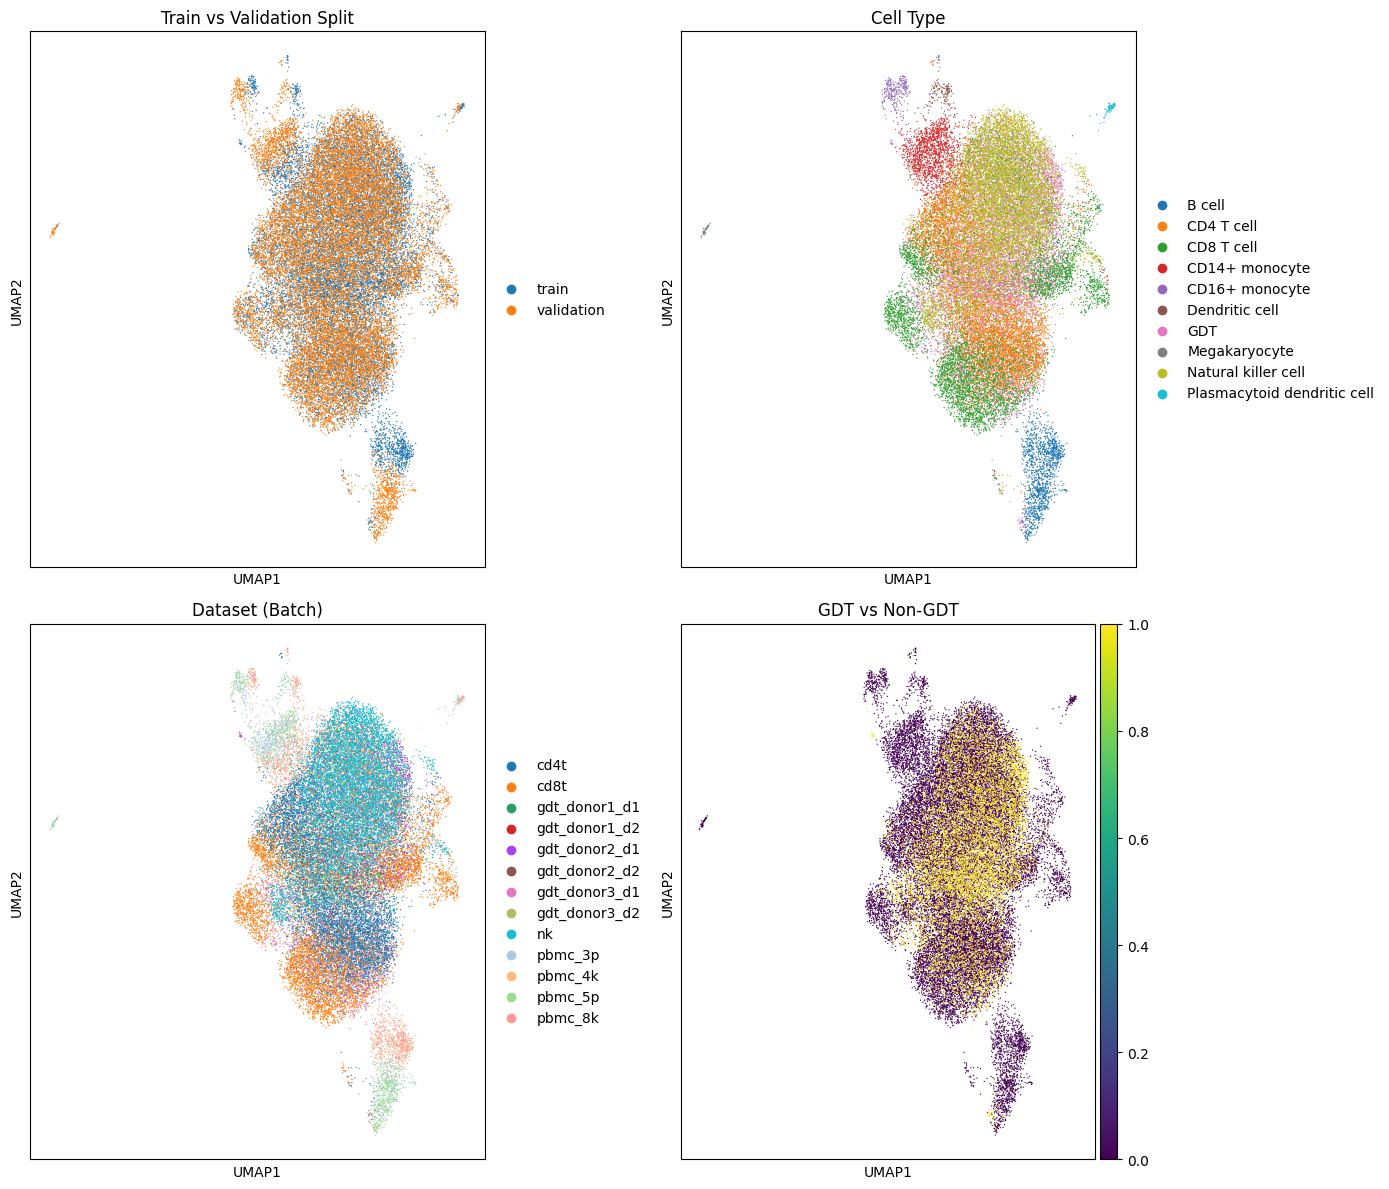

In [17]:
import matplotlib.pyplot as plt


# Visualize combined: color by train/val split
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Split (train vs validation)
sc.pl.umap(combined, color="split", ax=axes[0, 0], show=False, 
           title="Train vs Validation Split")

# Cell type
sc.pl.umap(combined, color="celltype", ax=axes[0, 1], show=False, 
           title="Cell Type")

# Dataset (batch)
sc.pl.umap(combined, color="dataset", ax=axes[1, 0], show=False, 
           title="Dataset (Batch)")

# GDT vs non-GDT
sc.pl.umap(combined, color="is_gdt", ax=axes[1, 1], show=False, 
           title="GDT vs Non-GDT", 
           palette=["lightgray", "red"])

plt.tight_layout()
plt.show()